# University of Applied Sciences Munich
## Kalman Filter Tutorial

---
(c) Lukas Köstler (lkskstlr@gmail.com)

In [1]:
import ipywidgets as widgets
from ipywidgets import interact_manual
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)

import numpy as np
%matplotlib notebook

## Random Variables
---
* Random variable (r.v.): $X$
* Probability Density Function (pdf): $p(X=x)$
* Independence: $X$, $Y$ r.v. $p(X=x, Y=y) = p(X=x)*p(Y=y)$
 + This means X holds no information about Y and vice versa. 
 + $X$, $Y$ could be **samples** from the same distribution $p(.)$

## Random Variables
---
* Mean Value / "Expectation": $\mu$, $E[X]$
 
 $E[X] = \int_{-\infty}^{\infty} \, x \cdot p(X=x) \,dx$
 
* Variance / Expected squared deviation: $Var(X)$:

 $Var(X) = \int_{-\infty}^{\infty} \, \left(x-\mu\right)^2 \cdot p(X=x) \,dx = E[X^2] - E[X]^2$

* Standard deviation (std): $\sigma$

 $\sigma = \sqrt{Var(X)}$

## Gaussian Distribution (Normalverteilung)
---
### PDF
If $X$ is a gaussian r.v.:
\begin{equation}
p(X=x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp\left( -\frac{1}{2 \sigma^2}(x-\mu)^2\right)
\end{equation}
where $\mu \in \mathcal{R}$ is the mean and $\sigma \in [0, \infty)$ is the standard deviation.

---
Sources: The very good [matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) (eqn. 355, watch out $\Sigma = \sigma^2$) and surely [wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

In [2]:
%%capture

# Capture captures the output

def normal_pdf(x, mu=0.0, sigma=1.0):
    return 1.0 / np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5/sigma**2 * (x-mu)**2)

xx01 = np.linspace(-5,5,1000)
yy01 = normal_pdf(xx01, 0.0, 1.0)

fig01 = plt.figure();
ax01 = fig01.add_subplot(1,1,1);
line01, = ax01.plot(xx01, yy01);

ax01.set_xlim(-5,5)
ax01.set_ylim(0.0, np.amax(yy01)*1.2)

def update01(mu, sigma):
    global xx01, ax01, line01
    yy01 = normal_pdf(xx01, mu, sigma)
    line01.set_ydata(yy01)
    ax01.set_ylim(0.0, np.amax(yy01)*1.2)
    fig01.canvas.draw()

w01_mu = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step = 0.2)
w01_sigma = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step = 0.1)

A Jupyter Widget

<function __main__.update01>

<IPython.core.display.Javascript object>


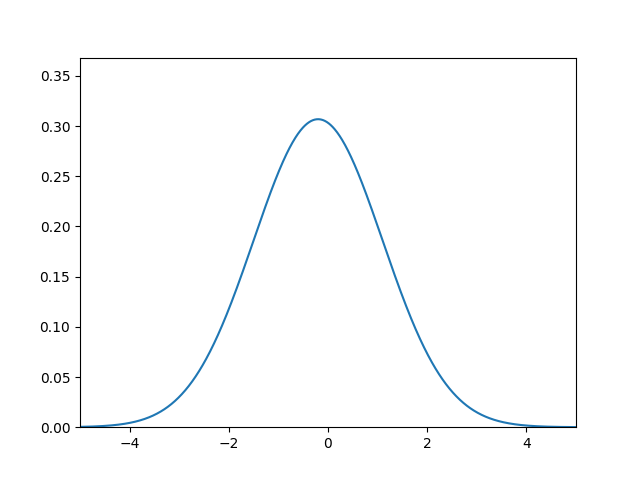

In [3]:
display(interact_manual(update01, mu=w01_mu, sigma=w01_sigma));
display(fig01);

## Gaussian Distribution (Normalverteilung)
---
### Addition
If $X$, $Y$ are **independent** gaussian r.v.s the Sum $Z = X+Y$ is again a gaussian r.v. with:
\begin{align*}
\mu_Z &= \mu_X + \mu_Y \\
\sigma^2_Z &= \sigma^2_X + \sigma^2_Y
\end{align*}

If they are dependent the variance is different.

In [4]:
%%capture
mu02_Y = 0.0
sigma02_Y = 0.5

# assume mu_X = 0.0, sigma_X = 1.0
mu02_Z = mu02_Y
sigma02_Z = np.sqrt(1.0**2 + sigma02_Y**2)

xx02 = np.linspace(-5,5,1000)
yy02_X = normal_pdf(xx02, 0.0, 1.0)
yy02_Y = normal_pdf(xx02, mu02_Y, sigma02_Y)
yy02_Z = normal_pdf(xx02, mu02_Y, np.sqrt(1.0**2 + sigma02_Y**2))


fig02 = plt.figure();
ax02 = fig02.add_subplot(1,1,1);
line02_X, = ax02.plot(xx02, yy02_X, '--', label="p(X=x)", alpha=0.3);
line02_Y, = ax02.plot(xx02, yy02_Y, '--', label="p(Y=y)");
line02_Z, = ax02.plot(xx02, yy02_Z, label="p(Z=z)");


ax02.set_xlim(-5,5)
ax02.set_ylim(0.0, 1.2*max(np.amax(yy02_X), np.amax(yy02_Y), np.amax(yy02_Z)))
ax02.legend()

ax02.set_xlabel("$\\mu_Y={:.2f}$, $\\sigma_Y={:.2}$ $\\rightarrow$ $\\mu_Z={:.2}$, $\\sigma_Z={:.2}$".format(mu02_Y, sigma02_Y, mu02_Z, sigma02_Z))
ax02.set_title(r"$Z = X+Y$"
               "\n"
               r"$\mu_X=0$, $\sigma_X=1$")

def update02(mu_Y, sigma_Y):
    global xx02, ax02, yy02_X, yy02_Y, yy02_Z, line02_Y, line02_Z
    
    mu_Z = 0.0 + mu_Y
    sigma_Z = np.sqrt(1.0**2 + sigma_Y**2)
    
    yy02_Y = normal_pdf(xx02, mu_Y, sigma_Y)
    yy02_Z = normal_pdf(xx02, mu_Z, sigma_Z)
    
    line02_Y.set_ydata(yy02_Y)
    line02_Z.set_ydata(yy02_Z)
    
    ax02.set_ylim(0.0, 1.2*max(np.amax(yy02_X), np.amax(yy02_Y), np.amax(yy02_Z)))
    
    ax02.set_xlabel("$\\mu_Y={:.2f}$, $\\sigma_Y={:.2}$ $\\rightarrow$ $\\mu_Z={:.2}$, $\\sigma_Z={:.2}$".format(mu_Y, sigma_Y, mu_Z, sigma_Z))
    fig02.canvas.draw()

w02_mu_Y = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step = 0.2)
w02_sigma_Y = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step = 0.1)

A Jupyter Widget

<function __main__.update02>

<IPython.core.display.Javascript object>


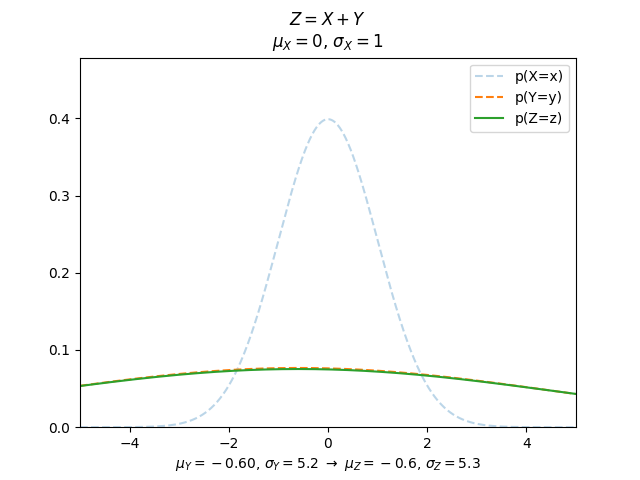

In [5]:
display(interact_manual(update02, mu_Y=w02_mu_Y, sigma_Y=w02_sigma_Y));
display(fig02);

## Gaussian Distribution (Normalverteilung)
---
### Measurement, i.e. Multiplication of the pdfs
+ **Not**: $Z = X\cdot Y$ 
+ $X$, $Y$ are **independent** gaussian r.v.s
+ $X$, $Y$ are measurements of the same quantity $Z$
+ Example: Two different people measure the height of the Eiffel tower
+ For $Z$: $p(Z=z) = p(X=z \land Y=z) = c \cdot p(X=z)\cdot p(Y=z)$, $c>0$ constant

## Gaussian Distribution (Normalverteilung)
---
### Measurement, i.e. Multiplication of the pdfs
+ $Z$ is gaussian again with:
\begin{align*}
\sigma_Z^2 &= \left( \frac{1}{\sigma_X^2} + \frac{1}{\sigma_Y^2} \right)^{-1} \\
\mu_Z &= \sigma_Z^2 \left( \frac{\mu_X}{\sigma_X^2} + \frac{\mu_Y}{\sigma_Y^2} \right)\\
\end{align*}

## Gaussian Distribution (Normalverteilung)
---
### Measurement, i.e. Multiplication of the pdfs
Sources: matrix cookbook (eqn. 371, watch out $\Sigma = \sigma^2$) and more easily [here](https://www.johndcook.com/blog/2012/10/29/product-of-normal-pdfs/) (some rearrangement is needed). 

In [16]:
%%capture
def mu_sigma_pdf_product(mu_X, sigma_X, mu_Y, sigma_Y):
    sigma_Z = np.sqrt( (1.0/sigma_X**2 + 1.0/sigma_Y**2)**(-1) )
    mu_Z = sigma_Z**2 * (mu_X/sigma_X**2 + mu_Y/sigma_Y**2)
    return mu_Z, sigma_Z

mu03_Y = 0.0
sigma03_Y = 0.5

# assume mu_X = 0.0, sigma_X = 1.0
mu03_Z, sigma03_Z = mu_sigma_pdf_product(0.0, 1.0, mu03_Y, sigma03_Y)

xx03 = np.linspace(-5,5,1000)
yy03_X = normal_pdf(xx03, 0.0, 1.0)
yy03_Y = normal_pdf(xx03, mu03_Y, sigma03_Y)
yy03_Z = normal_pdf(xx03, mu03_Z, sigma03_Z)


fig03 = plt.figure();
ax03 = fig03.add_subplot(1,1,1);
line03_X, = ax03.plot(xx03, yy03_X, '--', label="p(X=x)", alpha=0.3);
line03_Y, = ax03.plot(xx03, yy03_Y, '--', label="p(Y=y)");
line03_Z, = ax03.plot(xx03, yy03_Z, label="p(Z=z) = c p(X=z) p(Y=z)");
# line03_XY, = ax03.plot(xx03, yy03_X*yy03_Y) only to check manual calculation

ax03.set_xlim(-5,5)
ax03.set_ylim(0.0, 1.2*max(np.amax(yy03_X), np.amax(yy03_Y), np.amax(yy03_Z)))
ax03.legend()

ax03.set_xlabel("$\\mu_Y={:.2f}$, $\\sigma_Y={:.2}$ $\\rightarrow$ $\\mu_Z={:.2}$, $\\sigma_Z={:.2}$".format(mu03_Y, sigma03_Y, mu03_Z, sigma03_Z))
ax03.set_title(r"$\mu_X=0$, $\sigma_X=1$")

def update03(mu_Y, sigma_Y):
    global xx03, ax03, yy03_X, yy03_Y, yy03_Z, line03_Y, line03_Z
    
    mu_Z, sigma_Z = mu_sigma_pdf_product(0.0, 1.0, mu_Y, sigma_Y)
    
    yy03_Y = normal_pdf(xx03, mu_Y, sigma_Y)
    yy03_Z = normal_pdf(xx03, mu_Z, sigma_Z)
    
    line03_Y.set_ydata(yy03_Y)
    line03_Z.set_ydata(yy03_Z)
    # line03_XY.set_ydata(yy03_X * yy03_Y) only to check 
    
    ax03.set_ylim(0.0, 1.2*max(np.amax(yy03_X), np.amax(yy03_Y), np.amax(yy03_Z)))
    
    ax03.set_xlabel("$\\mu_Y={:.2f}$, $\\sigma_Y={:.2}$ $\\rightarrow$ $\\mu_Z={:.2}$, $\\sigma_Z={:.2}$".format(mu_Y, sigma_Y, mu_Z, sigma_Z))
    fig03.canvas.draw()

w03_mu_Y = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step = 0.2)
w03_sigma_Y = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step = 0.1)

A Jupyter Widget

<function __main__.update03>

<IPython.core.display.Javascript object>


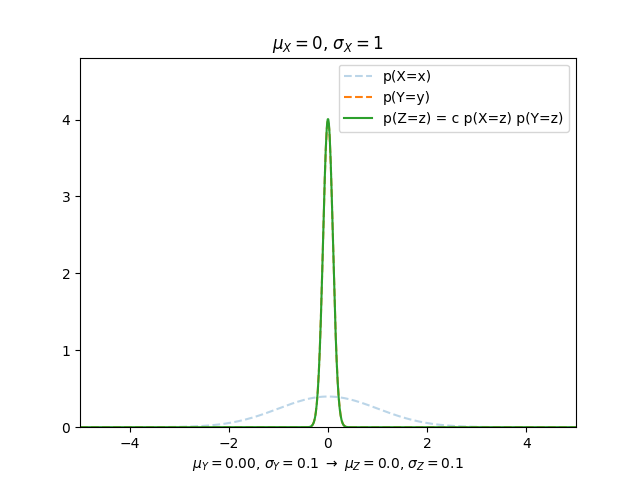

In [17]:
display(interact_manual(update03, mu_Y=w03_mu_Y, sigma_Y=w03_sigma_Y));
display(fig03);

## Gaussian Distribution (Normalverteilung)
---
### Linear function
+ $X$ is a gaussian r.v. with $\mu$, $\sigma$
+ $a$, $b$ are real numbers
+ $Y = aX + b$ is a gaussian r.v. with:
\begin{align*}
\mu_Y &= a \mu_X + b \\
\sigma_Y &= |a|\,\sigma_X
\end{align*}

---
Sources: The very good [matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) (eqn. 355, watch out $\Sigma = \sigma^2$)